In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
from keras.layers import Dense,GlobalAveragePooling2D
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
from keras.models import Model

Using TensorFlow backend.


KeyboardInterrupt: 

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

model.summary()

In [ ]:
img_path = 'C:/Users/salee/Desktop/Fyp Desktop/Baseline Model 1/data/Train/Biryani/1001.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

In [ ]:
vgg16_feature.shape

## NEW

In [ ]:
batch_size = 32
num_classes = 10
epochs = 1
saveDir = "./cifar10/"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
opt = keras.optimizers.adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

In [ ]:
y_traincl = keras.utils.to_categorical(y_train, num_classes)
y_testcl = keras.utils.to_categorical(y_test, num_classes)

# history = model.fit(x_train, y_traincl,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(x_test, y_testcl),
#                     callbacks=[es_cb],
#                     shuffle=True)

In [ ]:
# score = model.evaluate(x_test, y_testcl, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

In [ ]:
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[17].output])

In [ ]:
getFeature

In [ ]:
exTest1000 = getFeature([x_test[:2], 0])[0]

In [ ]:
exTest1000.shape

# LOAD

In [2]:
import pandas as pd
import numpy as np
import os

import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Dense,Flatten

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
train_datagen=ImageDataGenerator() #included in our dependencies

train_generator=train_datagen.flow_from_directory("C:/Users/salee/Desktop/Fyp Desktop/Mask_RCNN/logs",                                         target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 2 images belonging to 1 classes.


In [4]:
base_model=VGG16(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

In [5]:
opt = keras.optimizers.adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

In [6]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.engine.input_layer.InputLayer object at 0x000001F7460348C8>
1 <keras.layers.convolutional.Conv2D object at 0x000001F73B132E48>
2 <keras.layers.convolutional.Conv2D object at 0x000001F7460158C8>
3 <keras.layers.pooling.MaxPooling2D object at 0x000001F74606C288>
4 <keras.layers.convolutional.Conv2D object at 0x000001F74606C448>
5 <keras.layers.convolutional.Conv2D object at 0x000001F745DBA408>
6 <keras.layers.pooling.MaxPooling2D object at 0x000001F7470926C8>
7 <keras.layers.convolutional.Conv2D object at 0x000001F747092708>
8 <keras.layers.convolutional.Conv2D object at 0x000001F7470ABEC8>
9 <keras.layers.convolutional.Conv2D object at 0x000001F7470D79C8>
10 <keras.layers.pooling.MaxPooling2D object at 0x000001F747105108>
11 <keras.layers.convolutional.Conv2D object at 0x000001F7470EF408>
12 <keras.layers.convolutional.Conv2D object at 0x000001F746007D48>
13 <keras.layers.convolutional.Conv2D object at 0x000001F74714FEC8>
14 <keras.layers.pooling.MaxPooling2D object at 0x000001

In [7]:
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[17].output])

In [8]:
x,y=train_generator[0]

In [9]:
x.shape

(2, 128, 128, 3)

In [10]:
exTest1000 = getFeature([x, 0])[0]

In [11]:
exTest1000.shape

(2, 8, 8, 512)

In [46]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

orb = cv.ORB_create()

In [50]:
kp1, des1 = orb.detectAndCompute(x[1],None)

In [66]:
des1.shape

(256, 32)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


IndexError: index 64 is out of bounds for axis 3 with size 64

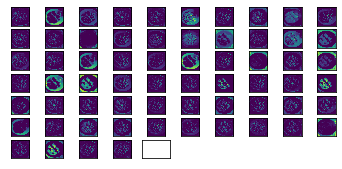

In [22]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16(weights='imagenet',include_top=False)
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('C:/Users/salee/Desktop/Fyp Desktop/Mask_RCNN/Food/train/8421.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 10
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()